In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
import pandas as pd
import numpy as np
from sklearn import tree

In [30]:
data = pd.read_csv("/Users/dheerajchoppara/Documents/Ivey/Thesis/Program Files/average_sample_data.csv",encoding= 'unicode_escape')

In [31]:
data.head()

,ï»¿Variation ID,Young Modulus [Mpa],Yield Strength [Mpa],Elongation at Yield,UTS [Mpa],Elongation at break,% Water,% Agar,%Gly,Water [ml],...,A,B,C,EM,E,Area,Inicial weight (Mixture + tray) [gr],Sample tray [gr],Tï¿½ fabrication [ï¿½C],Mixture [ml]
0,1,0.218600,0.432177,2.500000,2.438400,32.518840,98.9,0.5,0.6,800,...,8.82,11.5,3.5,31.586000,0.143200,0.501200,340.2,139.0,92.0,200
1,2,0.571340,1.058822,2.720000,4.695640,30.705980,99.2,0.5,0.3,800,...,8.82,11.5,3.5,31.440000,0.115600,0.404600,328.3,139.5,94.0,200
2,3,0.149840,0.261169,1.940000,1.328980,34.343480,98.3,0.5,1.3,600,...,8.82,11.5,3.5,31.700000,0.152800,0.593540,284.4,139.0,95.5,200
3,4,1.200900,1.923173,2.300000,7.673900,23.424650,99.5,0.3,0.2,1200,...,8.82,11.5,3.5,31.723333,0.046500,0.162750,287.5,138.5,99.0,200
4,5,0.111683,0.441865,5.066667,2.059067,28.969617,99.0,0.3,0.6,1200,...,8.82,11.5,3.5,31.453333,0.078167,0.273583,285.8,138.5,97.0,200


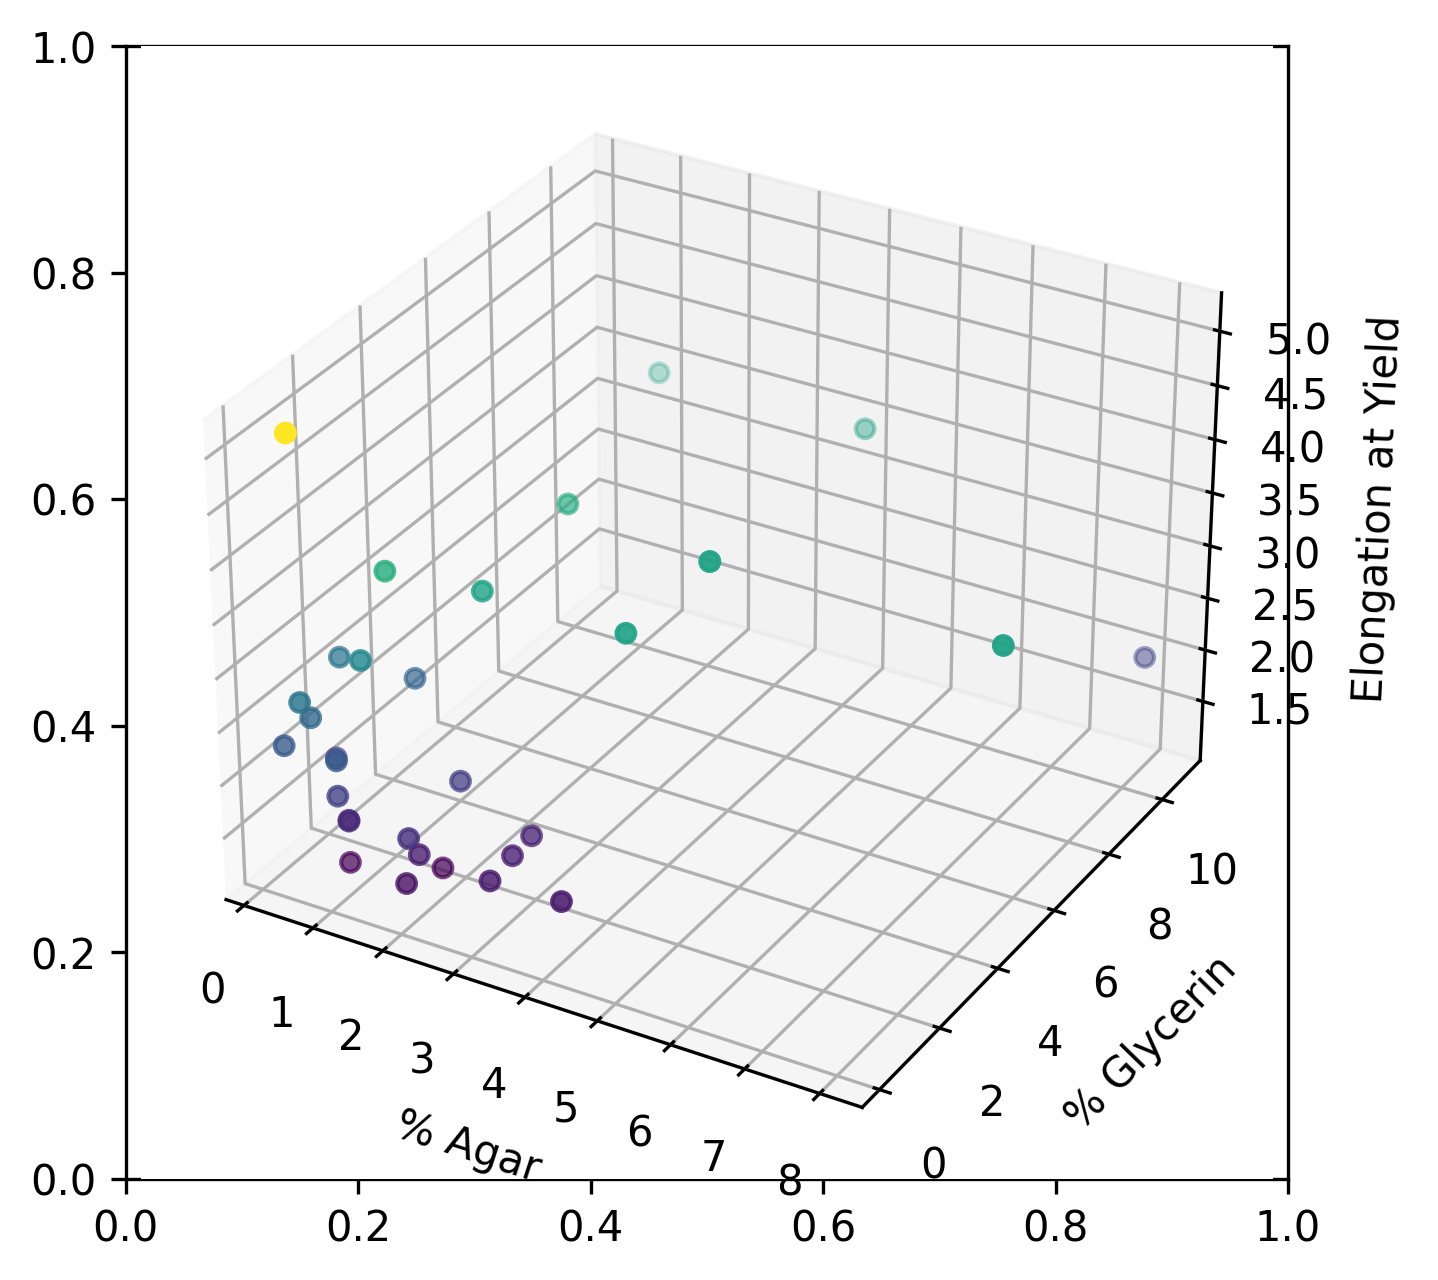

In [32]:
#Exploratory Analysis
from matplotlib import pyplot as plt
fig = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = data[["Elongation at Yield"]]
xdata = data[["% Agar "]]
ydata = data[["%Gly "]]
ax.scatter3D(xdata, ydata, zdata, c=zdata);
ax.set_xlabel('% Agar')
ax.set_ylabel('% Glycerin')
ax.set_zlabel('Elongation at Yield');

In [33]:
X = data[["% Water ", "% Agar ", "%Gly "]]
Y = data[["Elongation at Yield"]]

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [35]:
dt = DecisionTreeRegressor(max_depth=2, min_samples_leaf=0.1,random_state=3)

In [36]:
dt.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=2, min_samples_leaf=0.1, random_state=3)

In [37]:
Y_pred = dt.predict(X_test)

In [38]:
mse_dt = MSE(Y_test,Y_pred)
mse_dt

1.6979634626700357

In [39]:
rmse_dt = mse_dt**(1/2)
rmse_dt

1.3030592705898054

In [40]:
dt.score(X_test,Y_test)

-0.7604991055012309

[Text(0.4, 0.8333333333333334, 'X[0] <= 94.2\nsquared_error = 0.619\nsamples = 25\nvalue = 2.218'),
 Text(0.2, 0.5, 'squared_error = 0.354\nsamples = 5\nvalue = 3.194'),
 Text(0.6, 0.5, 'X[1] <= 1.5\nsquared_error = 0.388\nsamples = 20\nvalue = 1.974'),
 Text(0.4, 0.16666666666666666, 'squared_error = 0.402\nsamples = 12\nvalue = 2.271'),
 Text(0.8, 0.16666666666666666, 'squared_error = 0.039\nsamples = 8\nvalue = 1.53')]

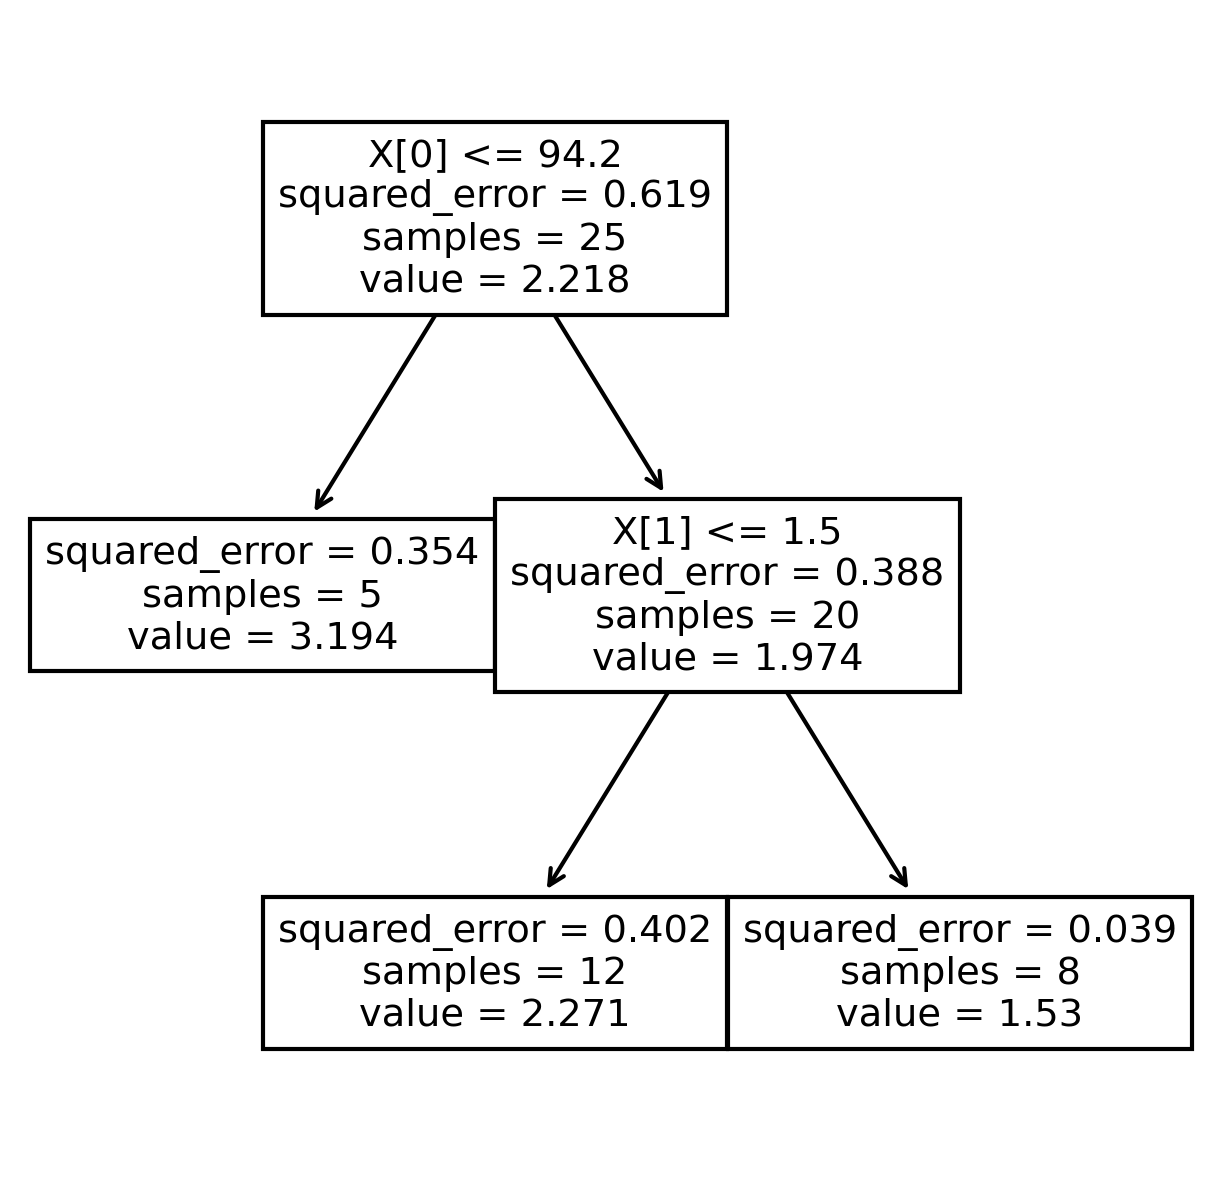

In [41]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(dt)

In [42]:
print(X_test)

    % Water   % Agar   %Gly 
20      95.3      2.0    2.7
17      97.4      2.0    0.6
5       97.8      0.3    1.9
14      88.3      1.0   10.7
28      90.7      4.0    5.4
27      90.7      4.0    5.4
4       99.0      0.3    0.6


In [43]:
print(Y_test)

    Elongation at Yield
20             3.450000
17             1.516667
5              2.700000
14             3.450000
28             3.450000
27             3.450000
4              5.066667


In [44]:
print(Y_pred)

[1.52979167 1.52979167 2.27069444 3.194      3.194      3.194
 2.27069444]
